## Binary Classification: Logistic Regression

### 1. Load and Inspect

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_data = pd.read_csv("loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [26]:
loan_data['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loan_data.describe(include=['O'])

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


<Axes: ylabel='Density'>

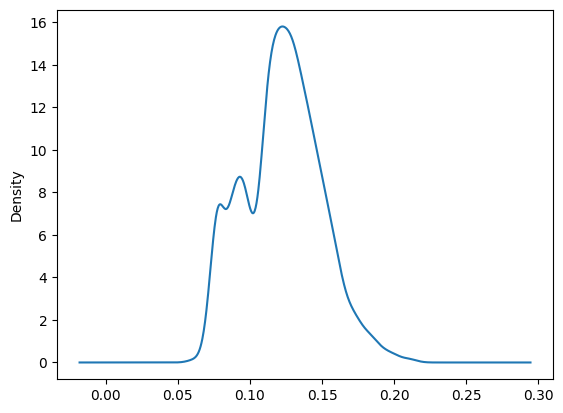

In [27]:
loan_data['int.rate'].plot(kind='kde')

### 2. Preprocessing

In [6]:
loan_data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
loan_data.duplicated().sum()

0

### 3. EDA

In [8]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [29]:
loan_data['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [9]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose", drop_first=True, dtype=int)
print(encoded_loan_data.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card             int32
purpose_debt_consolidation      int32
purpose_educational             int32
purpose_home_improvement        int32
purpose_major_purchase          int32
purpose_small_business          int32
dtype: object


In [30]:
len(encoded_loan_data.columns)

19

In [28]:
encoded_loan_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [10]:
len(encoded_loan_data.columns)

19

In [11]:
encoded_loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


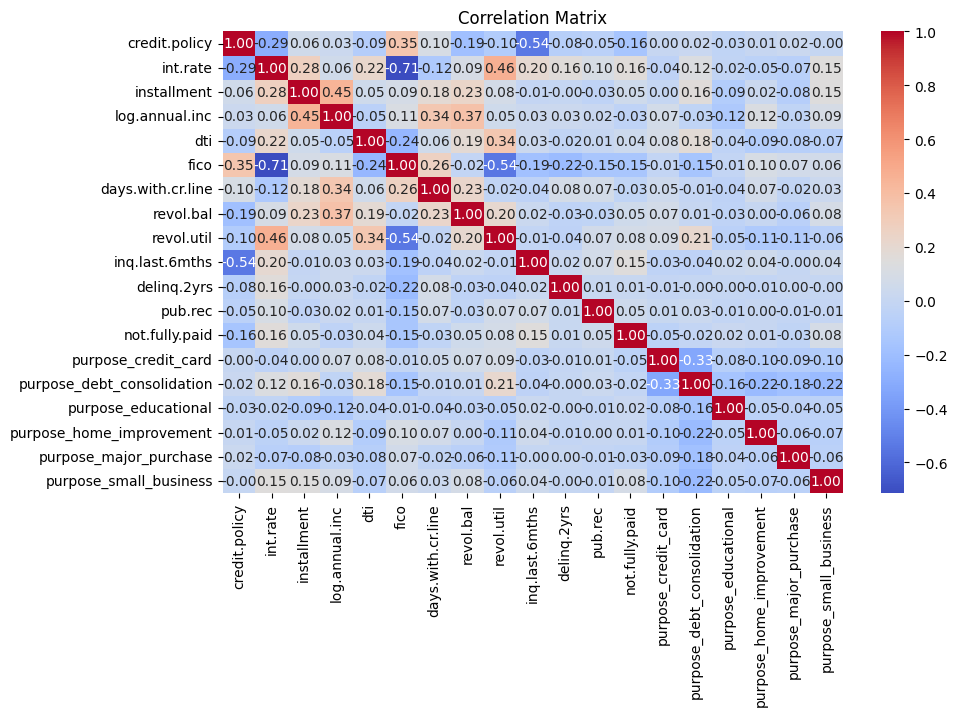

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(encoded_loan_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [13]:
encoded_loan_data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

### 4. Separate data into train and test

In [14]:
from sklearn.model_selection import train_test_split

X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state=2022)

### 5. Model Training & Evaluation

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.45      0.01      0.02       460

    accuracy                           0.84      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.78      0.84      0.77      2874



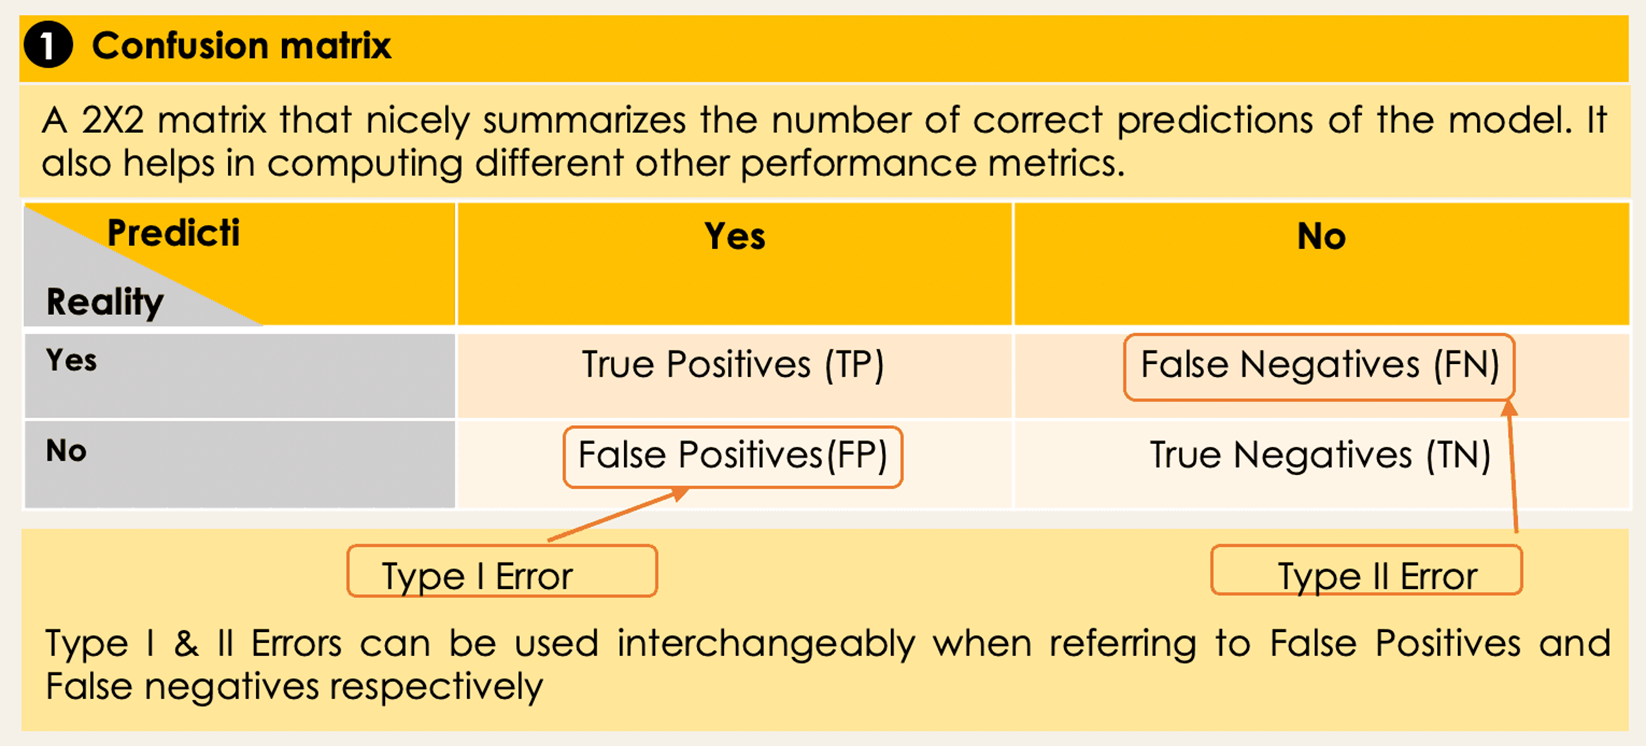

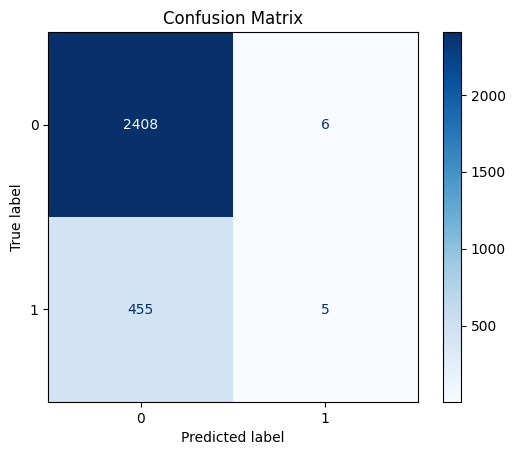

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logistic_classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Useful Parameters

- Trainable Parameters (learned while training such as weights/coef and bias/intercept terms)
- Non-Trainable Parameter

| Name              | Type              | Learned? | Shape (Binary / Multiclass)         | Why Inspect It |
|-------------------|------------------|----------|--------------------------------------|-----------------|
| `coef_`           | Attribute         | Yes      | (1, n_features) / (n_classes, n_features) | Feature weights (importance & direction) |
| `intercept_`      | Attribute         | Yes      | (1,) / (n_classes,)                  | Bias term |
| `classes_`        | Attribute         | Yes      | (n_classes,)                         | Order of class labels |
| `n_iter_`         | Attribute         | Yes      | (1,) or (n_classes,)                 | Number of iterations (convergence check) |
| `C`               | Hyperparameter    | No       | Scalar                               | Inverse regularization strength |
| `penalty`         | Hyperparameter    | No       | String                               | Type of regularization (`l1`, `l2`, etc.) |
| `solver`          | Hyperparameter    | No       | String                               | Optimization algorithm used |
| `max_iter`        | Hyperparameter    | No       | Integer                              | Max iterations allowed |
| `multi_class`     | Hyperparameter    | No       | String                               | Multiclass strategy (`ovr`, `multinomial`) |

In [17]:
logistic_classifier.classes_

array([0, 1], dtype=int64)

In [18]:
logistic_classifier.coef_

array([[-2.14055061e-02,  1.43574177e-03,  8.80050142e-04,
         5.80524362e-03,  5.35400585e-03, -3.28226304e-03,
        -3.97770594e-05,  2.31436843e-06,  2.77754235e-03,
         1.34308780e-01,  4.46815210e-03,  6.27731409e-03,
        -8.15601467e-03, -1.10082248e-02,  2.77388942e-03,
         2.25533193e-03, -1.57605727e-03,  1.06379599e-02]])

In [19]:
logistic_classifier.intercept_

array([0.00212902])

In [20]:
logistic_classifier.feature_names_in_

array(['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'], dtype=object)

In [21]:
logistic_classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.0,
 'max_iter': 100,
 'n_jobs': None,
 'penalty': 'deprecated',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [22]:
logistic_classifier.n_iter_

array([100])

In [23]:
logistic_classifier.C

1.0

In [24]:
logistic_classifier.solver

'lbfgs'

In [25]:
logistic_classifier.max_iter

100

---

## Student Task: 
- Scale the data and train the model
- Hyperparameter Tuning: 
    - Perform without scaling
    - Then, scale and perform hyperparameter tuning

### End of Notebook